# This is due 15 Sep 2024

Industry_Portfolios.xlsx contains monthly nominal (net) returns (expressed as percentages) for ten industry portfolios, over the ten-year period from Jan 2004 through Dec 2013.

Use these returns to estimate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios:

1.) Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

2.) Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios:

3.) This graph must have expected (monthly) return on the vertical axis vs standard deviation of (monthly) return on the horizontal axis.

4.) This graph must cover the range from 0% to 2% on the vertical axis, in increments of 0.1% (or less).

5.) Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.

6.) Now suppose that the (net) risk-free rate is 0.13% per month:

7.) Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.

8.) Briefly explain the economic significance and relevance of the efficient frontier to an investor.

The two frontiers will intersect at single point: the tangency portfolio:

9.) Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.

10.) Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

https://numpy.org/doc/stable/reference/generated/numpy.dot.html

https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

# Portfolio optimization
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Sample Code

In [3]:
df = pd.read_excel('Industry_Portfolios.xlsx', index_col=0)

/Users/benny/Desktop/Projects/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [5]:
mean_std = pd.DataFrame({"mean_return":df.mean(),"std_return":df.std()})
mean_std

,mean_return,std_return
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


In [6]:
#1.calculate n*n covariance maxix of return
V = df.cov()
V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)
R = mean_std["mean_return"]
e = pd.Series([1]*len(V))
e.index = R.index

In [7]:
V

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [8]:
V_inv

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,0.429876,0.023643,-0.112285,0.024882,0.021094,-0.065760,-0.048818,-0.117872,-0.063023,-0.017062
Durbl,0.023643,0.090150,-0.111705,0.015757,-0.005553,-0.009380,-0.033053,0.033504,0.009987,-0.028401
Manuf,-0.112285,-0.111705,0.531457,-0.110817,-0.086167,-0.038411,0.024076,-0.020053,0.012936,-0.109786
Enrgy,0.024882,0.015757,-0.110817,0.079246,-0.003776,0.011309,0.014901,0.012606,-0.045812,0.010811
HiTec,0.021094,-0.005553,-0.086167,-0.003776,0.162260,-0.025940,-0.065166,-0.023093,0.000975,0.015239
Telcm,-0.065760,-0.009380,-0.038411,0.011309,-0.025940,0.249320,-0.045999,-0.001673,-0.079791,-0.014175
Shops,-0.048818,-0.033053,0.024076,0.014901,-0.065166,-0.045999,0.292320,-0.012069,0.022449,-0.067681
Hlth,-0.117872,0.033504,-0.020053,0.012606,-0.023093,-0.001673,-0.012069,0.212049,-0.015619,-0.048145
Utils,-0.063023,0.009987,0.012936,-0.045812,0.000975,-0.079791,0.022449,-0.015619,0.184832,0.016390
Other,-0.017062,-0.028401,-0.109786,0.010811,0.015239,-0.014175,-0.067681,-0.048145,0.016390,0.218928


In [9]:
R

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
Name: mean_return, dtype: float64

In [10]:
e

NoDur    1
Durbl    1
Manuf    1
Enrgy    1
HiTec    1
Telcm    1
Shops    1
Hlth     1
Utils    1
Other    1
dtype: int64

In [11]:
alpha = R.dot(V_inv).dot(e)
zeta = R.dot(V_inv).dot(R)
delta = e.dot(V_inv).dot(e)
R_mv = alpha/delta

In [12]:
alpha

0.1379432386993192

In [13]:
zeta

0.196408584644823

In [14]:
delta

0.1373875973567121

In [15]:
R_mv 

1.0040443340832612

In [16]:
#R_p from 0% to 2%
R_p = np.linspace(0, 2, 100) 

sigma_p = np.sqrt(1/delta + delta/(zeta*delta-alpha**2)*(R_p-R_mv)**2)

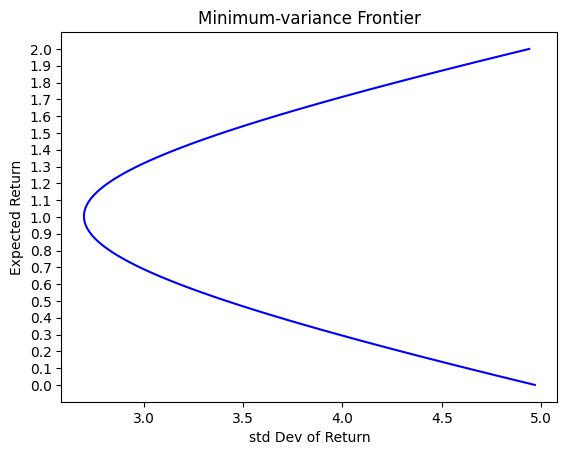

In [17]:
plt.plot(sigma_p, R_p, color='blue', linestyle='-')

#in increments of 0.1%
plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlabel('std Dev of Return')
plt.ylabel('Expected Return')
plt.title('Minimum-variance Frontier')
plt.show() 

In [18]:
R_f = 0.13

R_p_riskless = np.linspace(0, 2, 100) 
sigma_p_riskless = (R_p_riskless-R_f)/np.sqrt(zeta - 2*alpha*R_f + delta*(R_f**2))

In [19]:
R_p_riskless

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [20]:
sigma_p_riskless

array([-0.32212855, -0.27206972, -0.22201089, -0.17195207, -0.12189324,
       -0.07183442, -0.02177559,  0.02828324,  0.07834206,  0.12840089,
        0.17845972,  0.22851854,  0.27857737,  0.32863619,  0.37869502,
        0.42875385,  0.47881267,  0.5288715 ,  0.57893033,  0.62898915,
        0.67904798,  0.7291068 ,  0.77916563,  0.82922446,  0.87928328,
        0.92934211,  0.97940093,  1.02945976,  1.07951859,  1.12957741,
        1.17963624,  1.22969507,  1.27975389,  1.32981272,  1.37987154,
        1.42993037,  1.4799892 ,  1.53004802,  1.58010685,  1.63016568,
        1.6802245 ,  1.73028333,  1.78034215,  1.83040098,  1.88045981,
        1.93051863,  1.98057746,  2.03063629,  2.08069511,  2.13075394,
        2.18081276,  2.23087159,  2.28093042,  2.33098924,  2.38104807,
        2.43110689,  2.48116572,  2.53122455,  2.58128337,  2.6313422 ,
        2.68140103,  2.73145985,  2.78151868,  2.8315775 ,  2.88163633,
        2.93169516,  2.98175398,  3.03181281,  3.08187164,  3.13

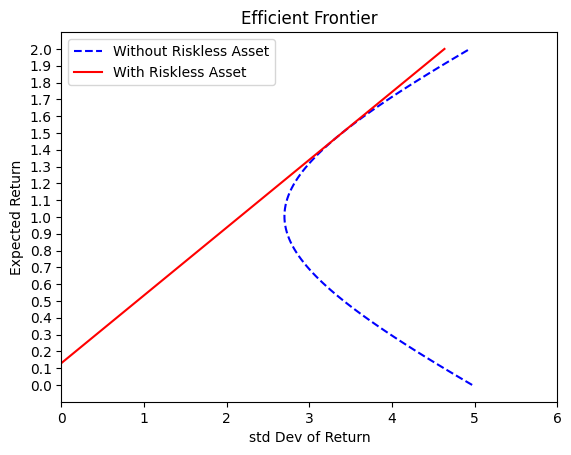

In [21]:
plt.plot(sigma_p, R_p, color='blue', linestyle='--', label = "Without Riskless Asset")
plt.plot(sigma_p_riskless, R_p_riskless, color='red', linestyle='-', label = "With Riskless Asset")

plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlim(0,6)
plt.xlabel('std Dev of Return')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

In [22]:
sharpe_ratio = np.sqrt(zeta - 2*alpha*R_f + delta*R_f**2)
sharpe_ratio

0.40356559934950903

In [23]:
R_tg = (alpha*R_f - zeta)/(delta*R_f - alpha)
a = (zeta*V_inv.dot(e)-alpha*V_inv.dot(R))/(zeta*delta-alpha**2)
b = (delta*V_inv.dot(R) - alpha*V_inv.dot(e))/(zeta*delta-alpha**2)
w_star = a + b*R_tg
w_star

NoDur    0.567972
Durbl   -0.214073
Manuf    0.714105
Enrgy    0.104087
HiTec   -0.363438
Telcm   -0.095463
Shops    0.991647
Hlth     0.075570
Utils    0.132643
Other   -0.913051
dtype: float64

In [24]:
R_tg

1.4862735358446897

In [25]:
a

NoDur    0.492659
Durbl    0.108058
Manuf   -1.952442
Enrgy   -0.012432
HiTec    0.529525
Telcm   -0.261093
Shops   -0.248495
Hlth     0.283151
Utils    0.695753
Other    1.365317
dtype: float64

In [26]:
b

NoDur    0.050673
Durbl   -0.216737
Manuf    1.794116
Enrgy    0.078397
HiTec   -0.600806
Telcm    0.111440
Shops    0.834397
Hlth    -0.139665
Utils   -0.378874
Other   -1.532939
dtype: float64

# Rewritten code

In [27]:
Industry_Portfolio=pd.read_excel("Industry_Portfolios.xlsx")

/Users/benny/Desktop/Projects/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [28]:
Industry_Portfolio

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [29]:
Industry_Portfolio.set_index("Date",inplace=True)

In [30]:
Industry_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [31]:
Industry_Portfolio.mean(axis=0)

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

In [32]:
Industry_Portfolio.std(axis=0)

NoDur    3.345657
Durbl    8.361852
Manuf    5.310270
Enrgy    6.081524
HiTec    5.381191
Telcm    4.448284
Shops    4.093786
Hlth     3.787172
Utils    3.701763
Other    5.582452
dtype: float64

In [33]:
Summary = pd.DataFrame({"Mean":Industry_Portfolio.mean(),"Std":Industry_Portfolio.std()})
Summary

,Mean,Std
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


In [34]:
Industry_Portfolio.cov()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [35]:
# # Correlation matrix
# plt.figure('Correlation')
# plt.clf()
# sns.heatmap(Industry_Portfolio.corr())
# plt.title('Correlation matrix')
# plt.gcf().set_size_inches((19,15))
# plt.show()

In [36]:
# Slide 4-5

#https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

R=pd.DataFrame(data=Industry_Portfolio.mean(axis=0))

V=Industry_Portfolio.cov()

V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

e = pd.DataFrame(data=np.ones((Industry_Portfolio.shape[1], 1)), 
                 index=Industry_Portfolio.columns, 
                 columns=["Dummy"])

In [37]:
V

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [38]:
V.T

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [39]:
V_inv

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,0.429876,0.023643,-0.112285,0.024882,0.021094,-0.065760,-0.048818,-0.117872,-0.063023,-0.017062
Durbl,0.023643,0.090150,-0.111705,0.015757,-0.005553,-0.009380,-0.033053,0.033504,0.009987,-0.028401
Manuf,-0.112285,-0.111705,0.531457,-0.110817,-0.086167,-0.038411,0.024076,-0.020053,0.012936,-0.109786
Enrgy,0.024882,0.015757,-0.110817,0.079246,-0.003776,0.011309,0.014901,0.012606,-0.045812,0.010811
HiTec,0.021094,-0.005553,-0.086167,-0.003776,0.162260,-0.025940,-0.065166,-0.023093,0.000975,0.015239
Telcm,-0.065760,-0.009380,-0.038411,0.011309,-0.025940,0.249320,-0.045999,-0.001673,-0.079791,-0.014175
Shops,-0.048818,-0.033053,0.024076,0.014901,-0.065166,-0.045999,0.292320,-0.012069,0.022449,-0.067681
Hlth,-0.117872,0.033504,-0.020053,0.012606,-0.023093,-0.001673,-0.012069,0.212049,-0.015619,-0.048145
Utils,-0.063023,0.009987,0.012936,-0.045812,0.000975,-0.079791,0.022449,-0.015619,0.184832,0.016390
Other,-0.017062,-0.028401,-0.109786,0.010811,0.015239,-0.014175,-0.067681,-0.048145,0.016390,0.218928


In [40]:
type(e)

pandas.core.frame.DataFrame

In [41]:
type(V)

pandas.core.frame.DataFrame

In [42]:
type(R)

pandas.core.frame.DataFrame

In [43]:
# Slide 11

# Compute Alpha
Alpha = (R.T @ V_inv @ e).values[0, 0]

# Compute Zeta
Zeta = (R.T @ V_inv @ R).values[0, 0]

# Compute Delta
Delta = (e.T @ V_inv @ e).values[0, 0]

In [44]:
Alpha

0.1379432386993192

In [45]:
Zeta

0.196408584644823

In [46]:
Delta

0.1373875973567121

In [47]:
# Slide 12

# Compute 'a'
numerator_a1 = (Zeta * V_inv @ e)
numerator_a2 = (Alpha * V_inv @ R)
numerator_a = numerator_a1.values - numerator_a2.values
denominator_a = (Zeta * Delta) - Alpha**2
a = numerator_a / denominator_a

In [48]:
a

array([[ 0.49265898],
       [ 0.1080583 ],
       [-1.95244213],
       [-0.01243221],
       [ 0.52952459],
       [-0.26109318],
       [-0.24849476],
       [ 0.28315077],
       [ 0.69575308],
       [ 1.36531657]])

In [49]:
# Slide 12

# Compute 'b'
numerator_b1 = (Delta * V_inv @ R)
numerator_b2 = (Alpha * V_inv @ e)
numerator_b = numerator_b1.values - numerator_b2.values
denominator_b = (Zeta * Delta) - Alpha**2
b = numerator_b / denominator_b

In [50]:
numerator_b1

,0
NoDur,0.010704
Durbl,-0.003801
Manuf,0.011411
Enrgy,0.001880
HiTec,-0.006177
Telcm,-0.001941
Shops,0.017806
Hlth,0.001597
Utils,0.002962
Other,-0.015490


In [51]:
numerator_b2

,Dummy
NoDur,0.010301
Durbl,-0.002076
Manuf,-0.002863
Enrgy,0.001256
HiTec,-0.001397
Telcm,-0.002828
Shops,0.011168
Hlth,0.002709
Utils,0.005976
Other,-0.003294


In [52]:
denominator_b

0.007955766441727293

In [53]:
b

array([[ 0.05067251],
       [-0.21673729],
       [ 1.79411608],
       [ 0.07839701],
       [-0.60080647],
       [ 0.11143973],
       [ 0.83439661],
       [-0.13966512],
       [-0.37887357],
       [-1.53293948]])

In [54]:
# Slide 12

# Create the DataFrame with a range of portfolio returns as the index
returns_range = np.arange(0, 2, 0.001)
Minimum_Varaince_Frontier = pd.DataFrame(index=returns_range, columns=Industry_Portfolio.columns)

# Fill the DataFrame with weights based on the formula
for portfolio_return in returns_range:
    weights = a + b * portfolio_return
    Minimum_Varaince_Frontier.loc[portfolio_return, :] = weights.T

Minimum_Varaince_Frontier

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0.000,0.492659,0.108058,-1.952442,-0.012432,0.529525,-0.261093,-0.248495,0.283151,0.695753,1.365317
0.001,0.49271,0.107842,-1.950648,-0.012354,0.528924,-0.260982,-0.24766,0.283011,0.695374,1.363784
0.002,0.49276,0.107625,-1.948854,-0.012275,0.528323,-0.26087,-0.246826,0.282871,0.694995,1.362251
0.003,0.492811,0.107408,-1.94706,-0.012197,0.527722,-0.260759,-0.245992,0.282732,0.694616,1.360718
0.004,0.492862,0.107191,-1.945266,-0.012119,0.527121,-0.260647,-0.245157,0.282592,0.694238,1.359185
...,...,...,...,...,...,...,...,...,...,...
1.995,0.593751,-0.324333,1.626819,0.14397,-0.669084,-0.038771,1.416126,0.004519,-0.0601,-1.692898
1.996,0.593801,-0.324549,1.628614,0.144048,-0.669685,-0.038659,1.416961,0.004379,-0.060479,-1.694431
1.997,0.593852,-0.324766,1.630408,0.144127,-0.670286,-0.038548,1.417795,0.00424,-0.060857,-1.695964
1.998,0.593903,-0.324983,1.632202,0.144205,-0.670887,-0.038437,1.41863,0.0041,-0.061236,-1.697497


In [55]:
# Slide 13
# Mean return for global minimum-variance portfolio
R_mv=Alpha/Delta
R_mv

1.0040443340832612

In [84]:
# Slide 13
# Variance for global minimum-variance portfolio
Variance_mv=(1/Delta)
Variance_mv

7.2786774005779264

In [91]:
# Weights for minimum variance portfolio

Weights_mv=a+b*R_mv
Weights_mv

array([[ 0.54353642],
       [-0.10955555],
       [-0.15107005],
       [ 0.06628186],
       [-0.07371175],
       [-0.14920275],
       [ 0.58927642],
       [ 0.1429208 ],
       [ 0.31534722],
       [-0.17382263]])

In [90]:
# Weights for minimum variance portfolio

Weights_mv=(1/Delta)*V_inv@e
Weights_mv

,Dummy
NoDur,0.543536
Durbl,-0.109556
Manuf,-0.151070
Enrgy,0.066282
HiTec,-0.073712
Telcm,-0.149203
Shops,0.589276
Hlth,0.142921
Utils,0.315347
Other,-0.173823


In [56]:
# Slide 13

Minimum_Varaince_Frontier["Variance"]=(1/Delta)+(Delta/(Zeta*Delta-Alpha**2))*(Minimum_Varaince_Frontier.index-R_mv)**2

In [57]:
Minimum_Varaince_Frontier["SD"]=np.sqrt(Minimum_Varaince_Frontier["Variance"])

In [58]:
Minimum_Varaince_Frontier

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Variance,SD
0.000,0.492659,0.108058,-1.952442,-0.012432,0.529525,-0.261093,-0.248495,0.283151,0.695753,1.365317,24.687575,4.968659
0.001,0.49271,0.107842,-1.950648,-0.012354,0.528924,-0.260982,-0.24766,0.283011,0.695374,1.363784,24.652915,4.965170
0.002,0.49276,0.107625,-1.948854,-0.012275,0.528323,-0.26087,-0.246826,0.282871,0.694995,1.362251,24.618289,4.961682
0.003,0.492811,0.107408,-1.94706,-0.012197,0.527722,-0.260759,-0.245992,0.282732,0.694616,1.360718,24.583698,4.958195
0.004,0.492862,0.107191,-1.945266,-0.012119,0.527121,-0.260647,-0.245157,0.282592,0.694238,1.359185,24.549142,4.954709
...,...,...,...,...,...,...,...,...,...,...,...,...
1.995,0.593751,-0.324333,1.626819,0.14397,-0.669084,-0.038771,1.416126,0.004519,-0.0601,-1.692898,24.236651,4.923073
1.996,0.593801,-0.324549,1.628614,0.144048,-0.669685,-0.038659,1.416961,0.004379,-0.060479,-1.694431,24.270894,4.926550
1.997,0.593852,-0.324766,1.630408,0.144127,-0.670286,-0.038548,1.417795,0.00424,-0.060857,-1.695964,24.305171,4.930027
1.998,0.593903,-0.324983,1.632202,0.144205,-0.670887,-0.038437,1.41863,0.0041,-0.061236,-1.697497,24.339483,4.933506


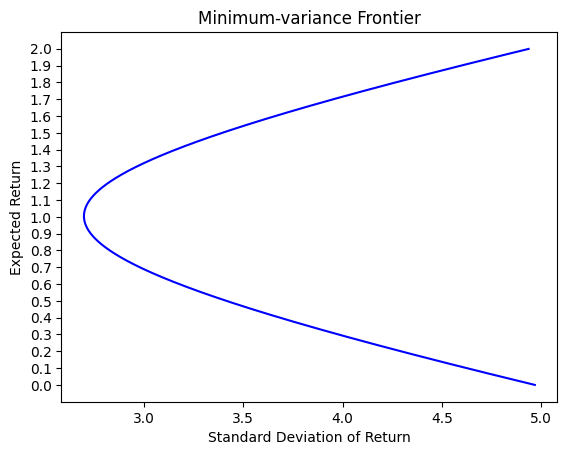

In [59]:
plt.plot(Minimum_Varaince_Frontier["SD"], Minimum_Varaince_Frontier.index, color='blue', linestyle='-')

#in increments of 0.1%
plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Minimum-variance Frontier')
plt.show() 

The economic significance and relevance of the minimum variance frontier to an investor is that it illustrates the minimum volatility achievable by a portfolio, for a given amount of expected return. Assuming that investors are risk-adverse and likes high returns but dislikes high risk, the minimum variance frontier would inform the investor what is the minimum volatility he can expect, for a given amount of expected return. Assuming that the risky assets that are available to the investor are not perfectly correlated with each other, by combining the assets and diversifying his investments, the investor is able to achieve better risk-adjusted returns compared to any one individual asset. At the same time, there are limits to diversification, any portfolios to the left of the minimum variance frontier are unachievable with any combinations of the current risky assets.

The minimum variance frontier also helps the investor in finding the global minimum-variance portfolio, which is the lowest volatility portfolio available (assuming no riskless asset), that the investor can achieve by combining the individual assets. The minimum variance frontier also helps the investor find the efficient frontier, which is the portfolio with the highest expected return for a given amount of volatility (to be elaborated on in later sections).

Overall, the minimum variance frontier informs the investor what is the best possible portfolio (lowest volatility) he can achieve for any given amount of expected return, by combining non-perfectly correlated assets together. By combining the minimum variance frontier with his personal utility function, he is able to find a portfolio that best suits his risk-return requirements.

**Minimum-variance frontier represents outermost envelope of attainable portfolios ⇒ no attainable portfolio exists on the left of the minimum-variance frontier.**
>**Risk-Return Tradeoff**: The minimum-variance frontier helps investors understand the tradeoff between risk and return. It illustrates that, for a given level of expected return, there is an optimal portfolio with the lowest possible risk. Investors can use this information to make informed decisions about their risk tolerance and desired returns.

>**Portfolio Diversification**: The concept of the minimum-variance frontier highlights the benefits of diversification. By investing in a mix of assets with low correlations, investors can achieve a lower overall portfolio risk than by holding individual assets. This diversification can improve risk-adjusted returns.

>**Efficient Frontier**: The minimum-variance frontier is a key component of the efficient frontier, which shows all portfolios that provide the highest expected return for a given level of risk. Investors aim to construct portfolios that lie on or above the efficient frontier, as these portfolios offer the best risk-return tradeoff.

>**Portfolio Optimization**: Investors can use the minimum-variance frontier to optimize their portfolios by selecting a mix of assets that aligns with their risk preferences and return expectations. This optimization helps investors achieve the best possible risk-return balance based on their specific goals and constraints.

In [60]:
rf=0.13

In [61]:
# Slide 25

# Note that the np.arrange is supposed to be portfolio standard deviation (the x-axis)
Risk_free_line = rf + np.arange(0, 6, 0.001)*(Zeta-2*Alpha*rf+Delta*(rf**2))**0.5

In [62]:
Risk_free_line

array([0.13      , 0.13040357, 0.13080713, ..., 2.5501829 , 2.55058646,
       2.55099003])

In [63]:
# Slide 25

Minimum_Varaince_Frontier["Riskless_Variance"]=((Minimum_Varaince_Frontier.index-rf)**2)/(Zeta - 2*Alpha*rf + Delta*(rf**2))

In [64]:
Minimum_Varaince_Frontier["Riskless_SD"]=np.sqrt(Minimum_Varaince_Frontier["Riskless_Variance"])

In [65]:
# This is to avoid having lines below the risk-free rate

Minimum_Varaince_Frontier["Riskless_SD"] = (Minimum_Varaince_Frontier.index-rf)/np.sqrt(Zeta - 2*Alpha*rf + Delta*(rf**2))

In [66]:
Minimum_Varaince_Frontier

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Variance,SD,Riskless_Variance,Riskless_SD
0.000,0.492659,0.108058,-1.952442,-0.012432,0.529525,-0.261093,-0.248495,0.283151,0.695753,1.365317,24.687575,4.968659,0.103767,-0.322129
0.001,0.49271,0.107842,-1.950648,-0.012354,0.528924,-0.260982,-0.24766,0.283011,0.695374,1.363784,24.652915,4.965170,0.102177,-0.319651
0.002,0.49276,0.107625,-1.948854,-0.012275,0.528323,-0.26087,-0.246826,0.282871,0.694995,1.362251,24.618289,4.961682,0.100599,-0.317173
0.003,0.492811,0.107408,-1.94706,-0.012197,0.527722,-0.260759,-0.245992,0.282732,0.694616,1.360718,24.583698,4.958195,0.099033,-0.314695
0.004,0.492862,0.107191,-1.945266,-0.012119,0.527121,-0.260647,-0.245157,0.282592,0.694238,1.359185,24.549142,4.954709,0.097479,-0.312217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.995,0.593751,-0.324333,1.626819,0.14397,-0.669084,-0.038771,1.416126,0.004519,-0.0601,-1.692898,24.236651,4.923073,21.356466,4.621306
1.996,0.593801,-0.324549,1.628614,0.144048,-0.669685,-0.038659,1.416961,0.004379,-0.060479,-1.694431,24.270894,4.926550,21.379375,4.623784
1.997,0.593852,-0.324766,1.630408,0.144127,-0.670286,-0.038548,1.417795,0.00424,-0.060857,-1.695964,24.305171,4.930027,21.402296,4.626262
1.998,0.593903,-0.324983,1.632202,0.144205,-0.670887,-0.038437,1.41863,0.0041,-0.061236,-1.697497,24.339483,4.933506,21.425229,4.628739


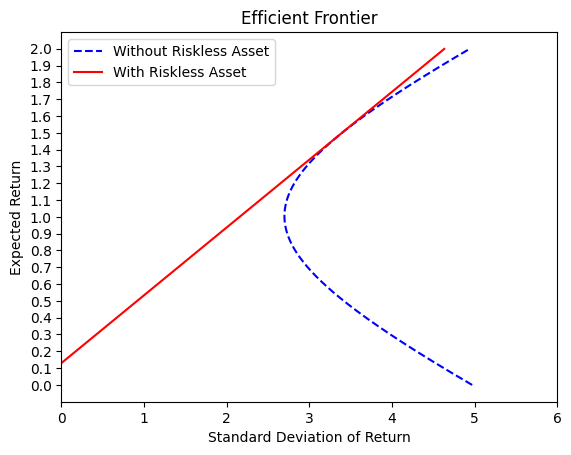

In [67]:
plt.plot(Minimum_Varaince_Frontier["SD"], Minimum_Varaince_Frontier.index, color='blue', linestyle='--', label = "Without Riskless Asset")
plt.plot(Minimum_Varaince_Frontier["Riskless_SD"], Minimum_Varaince_Frontier.index, color='red', linestyle='-', label = "With Riskless Asset")

plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlim(0,6)
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

The economic significance and relevance of the efficent frontier to an investor is that it illustrates what is the maximum expected return achievable by an investor for a given amount of risk. The efficient frontier is the top-half of the minimum variance frontier. In reality, for a risk averse investor, he will choose a portfolio on the efficient frontier rather than the bottom half of the minimum variance frontier, in order to maximize his expected utility. 

Assuming that the investor is risk adverse, likes return but dislike risk, he would choose a portfolio along the efficient frontier that best satisfies his risk-return requirements from his personal utility function. Any portfolio below the efficient frontier offers lower expected return for a similar amount of risk and the risk adverse investor would not choose such a portfolio when there is another portfolio available that offers higher return with similar amount of risk. Conversely, any portfolio above the efficient frontier is not achievable given the current universe of risky assets available to the investor.



**Efficient frontier consists of portfolios with highest potential reward for given amount of risk ⇒ risk-averse investor must invest in (optimal) portfolio on efficient frontier to maximise expected utility.**
>**Risk-Return Tradeoff**: The efficient frontier demonstrates the tradeoff between risk and return. It helps investors understand that there is an optimal portfolio mix that maximizes returns while minimizing risk. This knowledge is essential for making informed investment decisions aligned with their risk tolerance and financial goals.

>**Portfolio Diversification**: The concept of the efficient frontier highlights the benefits of diversification. By combining assets with different risk and return profiles, investors can construct portfolios that lie on or above the efficient frontier, achieving superior risk-adjusted returns compared to holding individual assets.

>**Portfolio Optimization**: Investors can use the efficient frontier to optimize their portfolios. By selecting a portfolio on the efficient frontier that matches their risk preferences and return expectations, they can achieve the best possible risk-return tradeoff, ensuring their investments align with their objectives.

>**Comparison and Evaluation**: The efficient frontier allows investors to compare different portfolios and investment strategies. They can assess whether their current portfolio is efficient or if adjustments are needed to enhance their risk-adjusted returns.

>**Benchmark for Performance**: The efficient frontier serves as a benchmark for measuring the performance of investment managers and investment products. Investors can evaluate how well a particular investment or fund performs in comparison to the efficient frontier, helping them make better investment choices.

In [68]:
# Slide 30

Sharpe = np.sqrt(Zeta - 2*Alpha*rf + Delta*rf**2)
Sharpe

0.40356559934950903

In [69]:
# Slide 28
# Return of tangency portfolio
R_tg = (Alpha*rf - Zeta)/(Delta*rf - Alpha)
R_tg


1.4862735358446897

In [70]:
# Slide 29
# Variance of return for tangency portfolio

Variance_tg=(Zeta-2*Alpha*R_f+Delta*R_f**2)/((Delta**2)*(R_f-R_mv)**2)
Variance_tg

11.294481468962038

In [81]:
# Slide 29
# Standard Deviation of return for tangency portfolio

StdDev_tg=-((Zeta-2*Alpha*R_f+Delta*R_f**2)**0.5)/(Delta*(R_f-R_mv))
StdDev_tg

3.360726330566361

In [82]:
Verify_Sharpe=(R_tg-rf)/StdDev_tg
Verify_Sharpe

0.40356559934950903

In [71]:
# Slide 12
# Get the weights for a frontier portfolio for a particular return
w_star = a + b*R_tg
w_star

array([[ 0.56797218],
       [-0.2140726 ],
       [ 0.71410511],
       [ 0.10408719],
       [-0.36343817],
       [-0.09546326],
       [ 0.99164683],
       [ 0.0755702 ],
       [ 0.13264333],
       [-0.91305081]])

In [72]:
Tangency_portfolio=pd.DataFrame(data=w_star,index=Industry_Portfolio.columns,columns=["Optimal_Weights"])

In [73]:
Tangency_portfolio

,Optimal_Weights
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643
Other,-0.913051


The tangency portfolio can be found at the point where the capital allocation line is tangent to the efficient frontier created by combining the risky assets. By combining a riskless asset with the existing portfolio of risky assets, a new efficient frontier is created as a straight line starting from the risk-free rate to the tangency point and continuing beyond that. The tangency portfolio illustrates the portfolio with maximum Sharpe ratio achievable by an investor by combining risky assets with a riskless asset. As risk-adverse investors likes return but dislike risk, he would want the best possible "reward-to-risk" on his investment portfolio and choose a portfolio along this efficient frontier which combines a risk-free bond and the tangency portfolio which also gives the best Sharpe. If an investor's optimal portfolio (considering his utility function) is to the left of the tangency portfolio, the investor will invest part of his wealth in the risk-free bond and part of his wealth in the tangency portfolio. If an investor's optimal portfolio (considering his utility function) is to the right of the tangency portfolio, the investor will borrow at the risk-free rate and invest more than 100% of his wealth in the tangency portfolio.

# Try creating a function for the whole thing

In [74]:
def EfficientFrontier_Function (Data:pd.DataFrame, index:str, rf:float, start:float, end:float, step:float):
    
    # Set index of the Dataframe
    Data.set_index(index,inplace=True)
    
    Summary = pd.DataFrame({"Mean":Data.mean(),"Std":Data.std()})
    
    print(Summary)
    
    # Slide 4-5
    R=pd.DataFrame(data=Data.mean(axis=0), columns=['Mean'])

    V=Data.cov()

    V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

    e = pd.DataFrame(data=np.ones((Data.shape[1], 1)), 
                    index=Data.columns, 
                    columns=["Dummy"])
    
    # Slide 11
    # Compute Alpha
    Alpha = (R.T @ V_inv @ e).values[0, 0]

    # Compute Zeta
    Zeta = (R.T @ V_inv @ R).values[0, 0]

    # Compute Delta
    Delta = (e.T @ V_inv @ e).values[0, 0]
    
    # Slide 12
    # Compute 'a'
    numerator_a1 = (Zeta * V_inv @ e)
    numerator_a2 = (Alpha * V_inv @ R)
    numerator_a = numerator_a1.values - numerator_a2.values
    denominator_a = (Zeta * Delta) - Alpha**2
    a = numerator_a / denominator_a
    
    # Slide 12
    # Compute 'b'
    numerator_b1 = (Delta * V_inv @ R)
    numerator_b2 = (Alpha * V_inv @ e)
    numerator_b = numerator_b1.values - numerator_b2.values
    denominator_b = (Zeta * Delta) - Alpha**2
    b = numerator_b / denominator_b
    
    # Slide 12
    # Create the DataFrame with a range of portfolio returns as the index
    returns_range = np.arange(start, end, step)
    Minimum_Varaince_Frontier = pd.DataFrame(index=returns_range, columns=Data.columns)

    # Fill the DataFrame with weights based on the formula
    for portfolio_return in returns_range:
        weights = a + b * portfolio_return
        Minimum_Varaince_Frontier.loc[portfolio_return, :] = weights.T
    
    # Slide 13
    # Calculate the Minimum Variance Portfolio
    R_mv=Alpha/Delta
    R_mv
    
    # Slide 13
    Minimum_Varaince_Frontier["Variance"]=(1/Delta)+(Delta/(Zeta*Delta-Alpha**2))*(Minimum_Varaince_Frontier.index-R_mv)**2
    Minimum_Varaince_Frontier["SD"]=np.sqrt(Minimum_Varaince_Frontier["Variance"])
    
    # Plot the Minimum Variance Frontier
    plt.plot(Minimum_Varaince_Frontier["SD"], Minimum_Varaince_Frontier.index, color='blue', linestyle='-')
    #in increments of 0.1%
    plt.yticks(np.arange(start, end+0.1, 0.1))
    plt.xlabel('Standard Deviation of Return')
    plt.ylabel('Expected Return')
    plt.title('Minimum-variance Frontier')
    plt.show() 
    
    # Calculate and plot the Efficient Frontier with riskless asset
    # Slide 25
    Minimum_Varaince_Frontier["Riskless_Variance"]=((Minimum_Varaince_Frontier.index-rf)**2)/(Zeta - 2*Alpha*rf + Delta*(rf**2))
    
    # This is to avoid having lines below the risk-free rate
    Minimum_Varaince_Frontier["Riskless_SD"] = (Minimum_Varaince_Frontier.index-rf)/np.sqrt(Zeta - 2*Alpha*rf + Delta*(rf**2))
    
    plt.plot(Minimum_Varaince_Frontier["SD"], Minimum_Varaince_Frontier.index, color='blue', linestyle='--', label = "Without Riskless Asset")
    plt.plot(Minimum_Varaince_Frontier["Riskless_SD"], Minimum_Varaince_Frontier.index, color='red', linestyle='-', label = "With Riskless Asset")
    plt.yticks(np.arange(start, end + 0.1, 0.1))
    plt.xlim(0,6)
    plt.xlabel('Standard Deviation of Return')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier')
    plt.legend()
    plt.show()
    
    # Calculate the Sharpe Ratio
    # Slide 30
    Sharpe = np.sqrt(Zeta - 2*Alpha*rf + Delta*rf**2)
    Sharpe
    
    # Calculate the Tangency Portfolio
    # Slide 28
    R_tg = (Alpha*rf - Zeta)/(Delta*rf - Alpha)
    w_star = a + b*R_tg
    w_star
    
    Tangency_portfolio=pd.DataFrame(data=w_star,index=Industry_Portfolio.columns,columns=["Optimal_Weights"])
    
    print(f'The Sharpe of the Tangency Portfolio is {Sharpe:.2f}')
    return Tangency_portfolio

In [75]:
Industry_Portfolio=pd.read_excel("Industry_Portfolios.xlsx")

/Users/benny/Desktop/Projects/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


           Mean       Std
NoDur  0.902833  3.345657
Durbl  0.733333  8.361852
Manuf  1.012833  5.310270
Enrgy  1.231167  6.081524
HiTec  0.766250  5.381191
Telcm  0.881417  4.448284
Shops  0.916333  4.093786
Hlth   0.783833  3.787172
Utils  0.907167  3.701763
Other  0.489083  5.582452


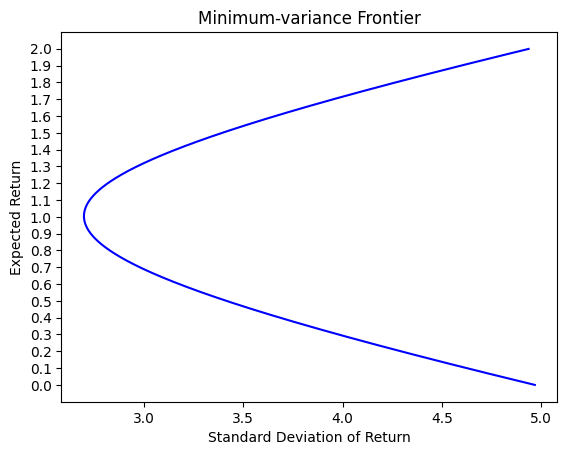

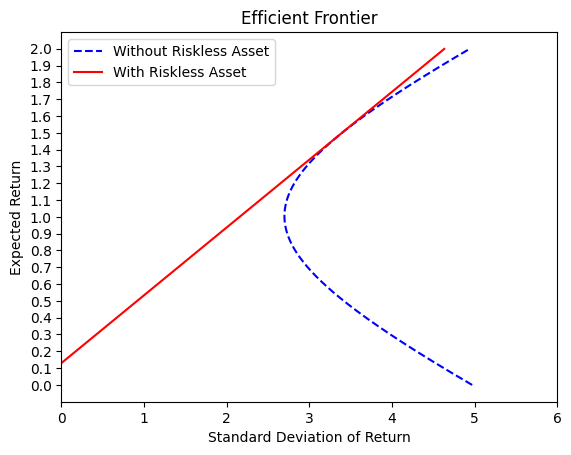

The Sharpe of the Tangency Portfolio is 0.40


,Optimal_Weights
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643
Other,-0.913051


In [76]:
EfficientFrontier_Function (Data= Industry_Portfolio, index="Date", rf=0.13, start=0, end=2, step=0.001)

# Sample function
 Weights of tangent portfolio most likely wrong

In [77]:
#Minimum-Variance Frontier
def MVF(data_portfolio, array_rf, y0, yt, num):    
    r_vector = data_portfolio.apply(np.mean, axis = 0)
    cov_matrix = data_portfolio.cov()
    n = len(r_vector.index)
    e_vector = np.ones((n, 1), dtype=int)    # Need to fix the column/row name here, otherwise will have trouble with matrix multiplication
    cov_inverse = np.linalg.inv(cov_matrix)
    
    #Alpha, Zeta, Theta
    alpha = (r_vector.T @ cov_inverse @ e_vector)[0]
    zeta = r_vector.T @ cov_inverse @ r_vector
    theta = (e_vector.T @ cov_inverse @ e_vector)[0]
    
    #Without Riskless Asset
    r_p1 = np.linspace(0, yt, num)
    sigma1 = np.sqrt((1 / theta) + 
            (theta / (zeta * theta - alpha ** 2 )) * 
            (r_p1 - alpha / theta) ** 2)
    
    mvf1 = pd.DataFrame(r_p1, columns = ['Mean Returns'])
    mvf1['Sigma'] = sigma1

    #With Riskless Asset(WRA)
    r_p2 = np.linspace(y0, yt, num)
    sigma2 = np.sqrt((r_p2 - array_rf) ** 2 / 
             (zeta - 2 * alpha * array_rf + theta * array_rf ** 2))
    
    mvf2 = pd.DataFrame(r_p2, columns = ['Mean Returns WRA'])
    mvf2['Sigma WRA'] = sigma2
    
    #Tangency Portfolio
    r_mv = alpha / theta
    r_tg = r_mv - ((zeta * theta - alpha ** 2) / (theta ** 2 * (array_rf - r_mv)))   # Slide28
    a = (zeta * cov_inverse @ e_vector - 
         alpha * cov_inverse @ r_vector) / (zeta * theta - alpha ** 2)  # Something wrong in the numerator here, has something to do with shape of r_vector
    b = (theta * cov_inverse @ r_vector - 
         alpha * cov_inverse @ e_vector) / (zeta * theta - alpha ** 2)  # Something wrong in the numerator here, has something to do with shape of r_vector
    weight_tg = a + b * r_tg
    rp_tg = r_tg - array_rf
    sigma_tg = -(zeta - 2*alpha*array_rf + theta*array_rf**2)**(1/2) / (theta*(array_rf - r_mv))
    sharpe_tg = rp_tg / sigma_tg
    
    print(f'The return of the mimimum variance portfolio is {r_mv}.')
    print(f'The return of the tangency portfolio is {r_tg}.')
    
    #Summary Table
    var_vector = [cov_matrix.iloc[i,i] for i in range(n)]
    table = pd.DataFrame(r_vector, 
                         index = r_vector.index, 
                         columns = ['Mean Returns'])
    table['SD of Returns'] = np.sqrt(var_vector)
    table['Weight Tangency'] = weight_tg[0]
    
    print('Risk premium for tangency portfolio: ', rp_tg[0])
    print('Sharpe ratio for tangency portfolio: ', sharpe_tg[0])
    print('\n')
    
    #Without Riskless Asset
    plt.figure()
    plt.ylabel('Mean Return (%)')
    plt.xlabel('Standard Deviation of Return (%)')
    plt.title('Minimum-Variance Frontier (Without Riskless Asset)')
    plt.plot(mvf1.loc[:, 'Sigma'], mvf1.loc[:,'Mean Returns'], 'b-', 
             label = 'Without Riskless Asset')
    
    #With Riskless Asset
    plt.figure()
    plt.ylabel('Mean Return (%)')
    plt.xlabel('Standard Deviation of Return (%)')
    plt.title('Minimum-Variance Frontier (With Riskless Asset)')
    plt.plot(mvf2.loc[:, 'Sigma WRA'], mvf2.loc[:,'Mean Returns WRA'], 'r-', 
             label = 'With Riskless Asset')
    
    #Combined
    plt.figure()
    plt.ylabel('Mean Return (%)')
    plt.xlabel('Standard Deviation of Return (%)')
    plt.title('Minimum-Variance Frontier')
    plt.plot(mvf1.loc[:, 'Sigma'], mvf1.loc[:,'Mean Returns'], 'b-', 
             label = 'Without Riskless Asset')
    plt.plot(mvf2.loc[:, 'Sigma WRA'], mvf2.loc[:,'Mean Returns WRA'], 'r-', 
             label = 'With Riskless Asset')
    plt.legend(loc='upper left')
    plt.show()
    
    return mvf1, mvf2, table

In [78]:
data_portfolio = pd.read_excel('Industry_Portfolios.xlsx', index_col=0)

/Users/benny/Desktop/Projects/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


The return of the mimimum variance portfolio is [1.00404433].
The return of the tangency portfolio is [1.48627354].
Risk premium for tangency portfolio:  1.3562735358446898
Sharpe ratio for tangency portfolio:  0.40356559934950903




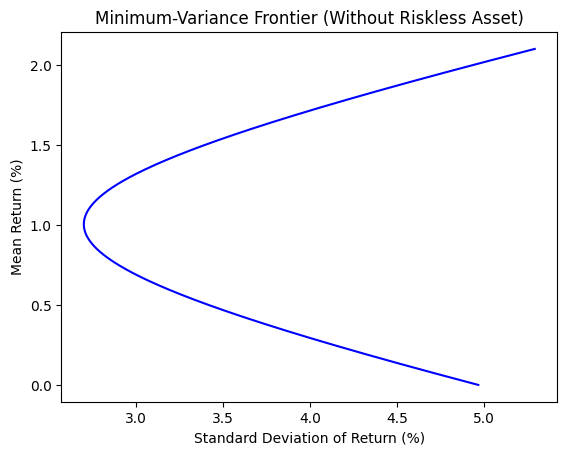

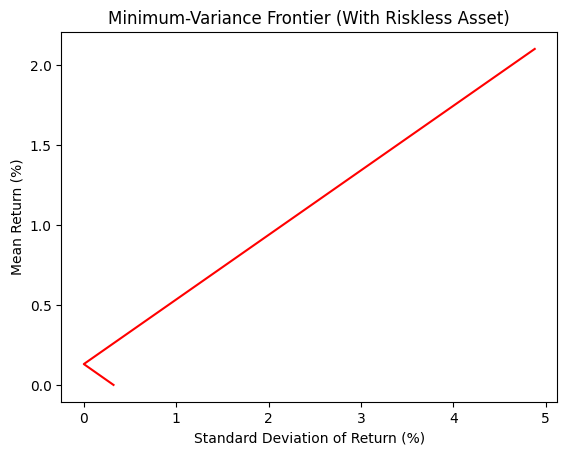

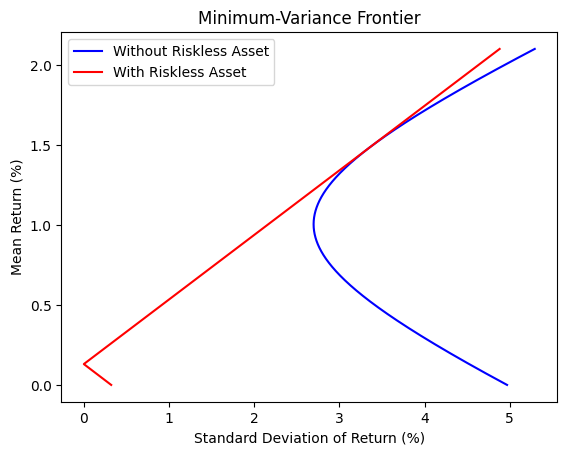

(     Mean Returns     Sigma
 0        0.000000  4.968659
 1        0.002102  4.961326
 2        0.004204  4.953997
 3        0.006306  4.946673
 4        0.008408  4.939354
 ..            ...       ...
 995      2.091592  5.263427
 996      2.093694  5.270930
 997      2.095796  5.278436
 998      2.097898  5.285946
 999      2.100000  5.293460
 
 [1000 rows x 2 columns],
      Mean Returns WRA  Sigma WRA
 0            0.000000   0.322129
 1            0.002102   0.316920
 2            0.004204   0.311711
 3            0.006306   0.306502
 4            0.008408   0.301293
 ..                ...        ...
 995          2.091592   4.860651
 996          2.093694   4.865860
 997          2.095796   4.871069
 998          2.097898   4.876278
 999          2.100000   4.881486
 
 [1000 rows x 2 columns],
        Mean Returns  SD of Returns  Weight Tangency
 NoDur      0.902833       3.345657         0.567972
 Durbl      0.733333       8.361852        -0.311209
 Manuf      1.012833       5.

In [79]:
MVF(data_portfolio=data_portfolio, array_rf=0.13, y0=0, yt=2.1, num=1000)